# 과제 내용 

## 과제 목적은 상용 Deep Learning 프레임워크를 사용해 보는 것이 목적입니다. 

* Tensorflow를 사용하여 MNIST 데이터 셋을 가지고 신경망을 작성하시요. ( MNIST 데이터 셋은 인터넷에서 다운 받아야 함)

* 조건 

   > 1. CNN(Convolution Neural Network) 사용하는 코드 

   > 2. FullyConnected 사용하는 코드 

   > 3. 코드에 주석을 반드시 달아야 함.  ( 주석이 없으면 감점 )

* 결과 

   훈련 정확도 97% 이상 & 테스트 정확도 96% 이상 



### 제출 방법 

* 결과물은 CNN 코드와 PDF 파일 ( 그래프 출력 화면, 정확도 로그 파일) (3점)

* FullyConnected 코드와 PDF 파일 ( 그래프 출력 화면, 정확도 로그 파일) (3점)

* 제출은 Github에 아래와 같은 폴더를 만들고, 제출시에는 "Github 주소 & - (이름)" 으로 보내주기 바랍니다. 
> 예)  https://github.com/DL/HW/hw#1 - (홍길동)

## 참고 코드: 
## https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

# 데이터 설명

### 다운로드 링크 : https://www.kaggle.com/c/digit-recognizer/data\

* open API 이용
* train.csv와 test.csv은 0부터 9까지의 손글씨 gray_scale 이미지를 갖습니다
* 각각 모두 28픽셀의 높이와 너비를 가지며 이는 784픽셀입니다.
* 각 픽셀은 0 - 255 사이의 값으로 밝기를 나타냅니다.
* train.csv의 첫번째 열은 'label'로 손글씨를 나타내고 나머지 784개의 열은 픽셀값입니다.
* test.csv는 label 열이 없는 것을 제외하고 위와 동일합니다. 
##### 
* 각 열은 pixel x이며 x는 ( i * 28 + j )를 나타내어 28 x 28 매트릭스를 표현합니다.
* j는 열을, i는 행을 의미합니다.

In [21]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

## 데이터 준비

In [23]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [24]:
Y_train = train["label"] #손글씨 열
X_train = train.drop(labels = ["label"],axis = 1) # 손글씨 열 제거

In [25]:
# 결측치 확인
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [26]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [27]:
# 정규화
X_train = X_train / 255.0
test = test / 255.0

In [28]:
# 3차원으로 재구성(reshape) (높이 = 28px, 너비 = 28px , 채널 = 1)
X_train = X_train.values.reshape(-1,28,28,1)  # -1 : 원래 데이터 개수에 맞게 행 개수를 조정
test = test.values.reshape(-1,28,28,1) # 1 채널은 흑백 이미지에 사용, RGB는 3

In [29]:
# 10가지 종류의 손글씨들 one-hot vectors로. (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [30]:
# 훈련, 검증 데이터 나누기
np.random.seed(2)
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, random_state=random_seed)

# train이 훈련데이터, val이 검증 데이터. x가 입력 데이터, y가 정답 데이터
# 훈련데이터들이 모두 고르게 분포되어있어서 클래스 비율을 아무렇게나 (0.1)로 설정.

In [31]:
#[[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Keras Sequential API를 이용한 CNN 모델 구성
Sequential API는 한 번에 하나의 층을 추가해가는 방식으로 모델을 설계할 수 있습니다. 첫 번째로 추가한 층은 Conv2D 층입니다. 이 층은 학습 가능한 필터 집합으로 구성됩니다.

> Conv2D 층:
이미지의 일부를 커널 크기(kernel size)로 정의된 필터를 사용해 변환합니다. 필터는 이미지 전체에 걸쳐 적용되며, 각 필터는 입력 이미지를 변환해 **특징 맵(feature map)**을 만듭니다. 이 과정을 통해 CNN은 유용한 특징을 추출합니다.

> 필터 개수:
저는 첫 번째와 두 번째 Conv2D 층에 각각 32개의 필터를 사용했고, 마지막 두 개의 Conv2D 층에는 64개의 필터를 사용했습니다. 필터가 많을수록 더 많은 특징을 학습할 수 있습니다.

### MaxPool2D 층 (Pooling 층)
두 번째로 중요한 층은 MaxPooling2D입니다. 이 층은 다운샘플링을 통해 이미지의 크기를 줄입니다. 2개의 인접한 픽셀 중 최대값을 선택해 계산하므로 연산 비용을 줄이고, 어느 정도 **과적합(overfitting)**도 완화하는 역할을 합니다.

> Pooling 크기:
풀링 크기가 커질수록 다운샘플링 정도가 커집니다. 이 과정을 통해 연산량이 줄어들고, 중요한 특징만 남길 수 있습니다.

### CNN의 장점
CNN은 **합성곱(Convolution)**과 **풀링(Pooling)**을 조합해 국소적인(local) 특징과 더 넓은 범위의(global) 특징을 동시에 학습할 수 있습니다. 이는 이미지의 패턴이나 구조를 잘 인식할 수 있도록 도와줍니다.

### Dropout 층 (정규화 기법)
Dropout은 정규화(regularization) 기법 중 하나로, 학습 중 임의의 노드(뉴런)를 무작위로 비활성화(가중치를 0으로 설정)합니다. 이렇게 하면 네트워크가 특정 노드에 의존하지 않고 분산된 방식으로 특징을 학습하도록 강제합니다. 이 기법은 일반화 능력을 향상시키고 과적합을 줄여줍니다.

### 활성화 함수: ReLU
'ReLU'(Rectified Linear Unit)는 활성화 함수 중 하나로, 수식은 **max(0, x)**입니다. 이 함수는 네트워크에 비선형성을 추가하여 더 복잡한 패턴을 학습할 수 있게 만듭니다.

### Flatten 층
Flatten 층은 최종 **특징 맵(feature map)**을 1차원 벡터로 변환합니다. 이 변환은 **완전 연결층(Dense 층)**을 사용하기 위해 필요합니다. 이전의 Conv2D와 MaxPool2D 층에서 추출된 로컬(local) 특징들을 하나의 벡터로 결합합니다.

### Dense 층 (완전 연결층)
마지막으로, 이 벡터를 두 개의 Dense 층(완전 연결층)에 입력했습니다. Dense 층은 인공신경망(ANN)의 분류기 역할을 합니다.

> 최종 Dense 층:
Dense(10, activation="softmax")는 10개의 클래스에 대한 확률 분포를 출력합니다. 이 확률 값들은 주어진 입력이 각 클래스에 속할 확률을 나타냅니다. Softmax는 전체 클래스에 걸쳐 확률의 합이 1이 되도록 보장합니다.

In [33]:
# 모델 컴파일 (Adam 옵티마이저, loss는 크로스엔트로피 사용)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

# 정확도 평가
val_loss, val_accuracy = model.evaluate(X_val, Y_val) # 손실, 정확도 확인
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8475 - loss: 0.4667 - val_accuracy: 0.9840 - val_loss: 0.0561
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9753 - loss: 0.0820 - val_accuracy: 0.9883 - val_loss: 0.0432
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9809 - loss: 0.0616 - val_accuracy: 0.9895 - val_loss: 0.0383
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9848 - loss: 0.0481 - val_accuracy: 0.9893 - val_loss: 0.0363
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9863 - loss: 0.0462 - val_accuracy: 0.9910 - val_loss: 0.0387
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9905 - val_loss: 0.0333
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9888 - loss: 0.0348 - val_accuracy: 0.9924 - val_loss: 0.0311
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9915 - 

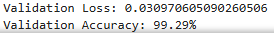

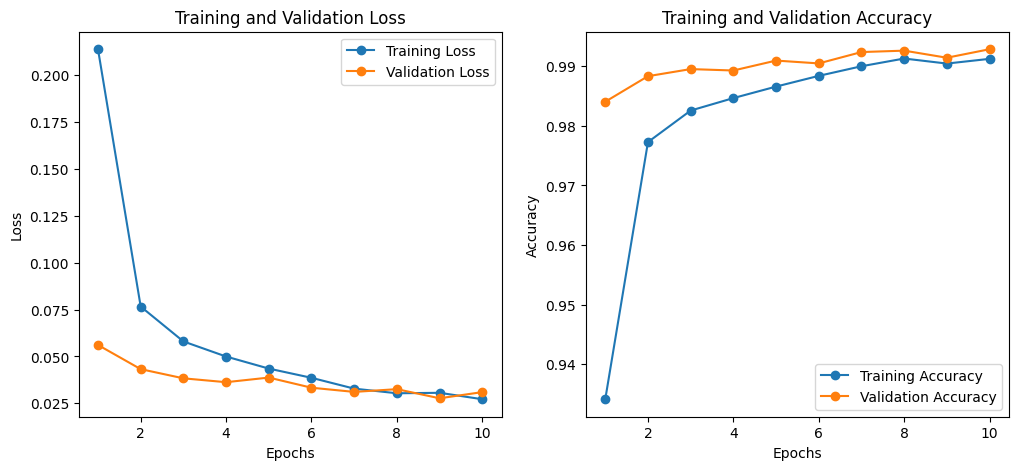

In [47]:
import matplotlib.pyplot as plt

# 훈련 과정의 손실과 정확도 데이터 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_loss) + 1)  # 1부터 epoch 수까지

# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 그래프 표시
plt.show()